# Distibution Plots

In [10]:
import seaborn as sns

In [11]:
%matplotlib inline

In [12]:
tips = sns.load_dataset('tips')

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/eric/Documents/prog/python/data_science_bootcamp/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

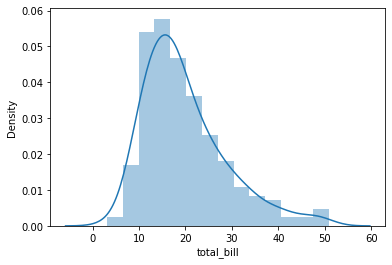

In [18]:
#Distplot to visualize the distribution of data
#Essentially a histogram
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill'>

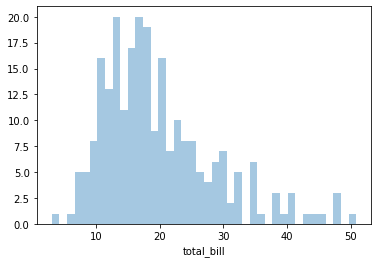

In [21]:
sns.distplot(tips['total_bill'],kde=False, bins=40)

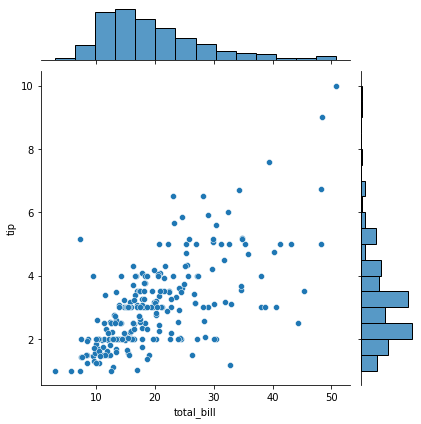

In [24]:
#jointplot returns two histograms and a scatter plot
sns.jointplot(x='total_bill',y='tip',data=tips)

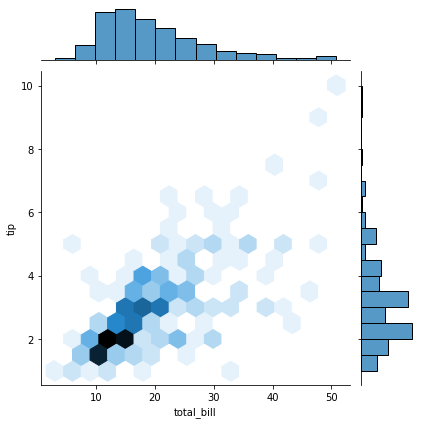

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

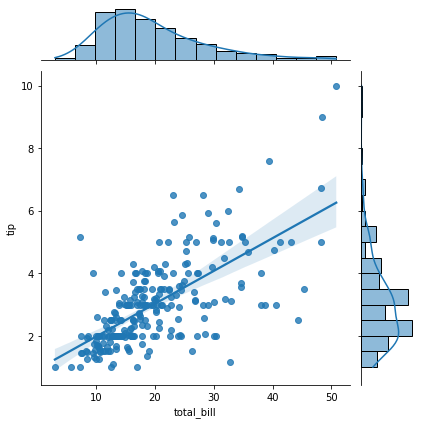

In [27]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

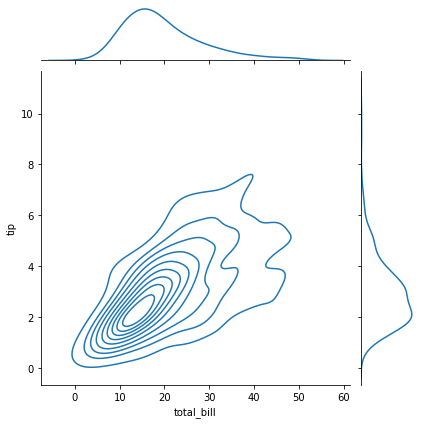

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

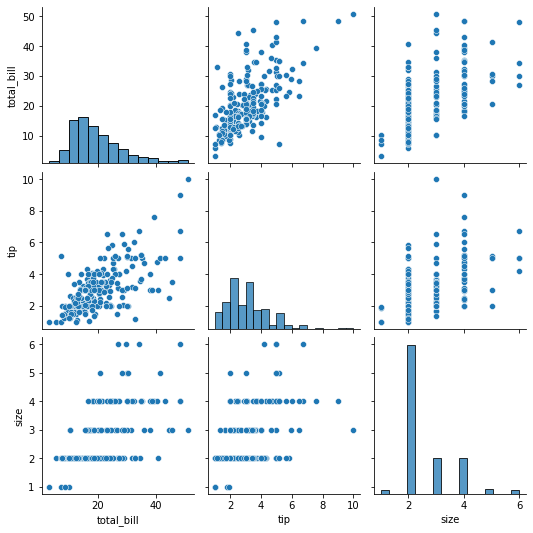

In [29]:
#pairplot is a jointplot or scatter plot for every combination in dataframe
sns.pairplot(tips)

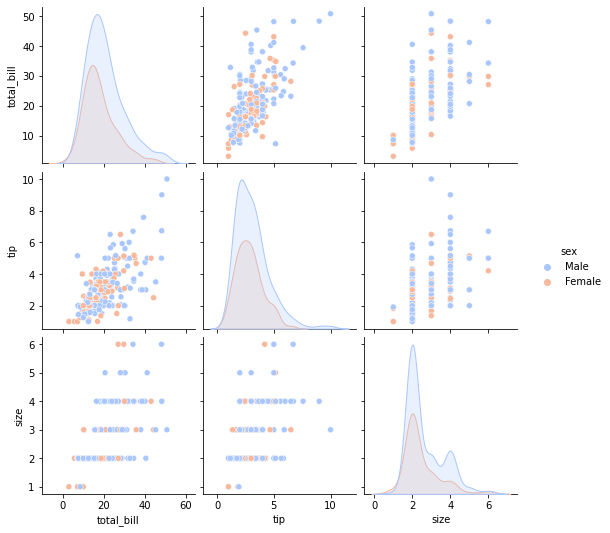

In [32]:
#Can set hue for categorical data like sex
#Where every point falls into two categories (male or female)
sns.pairplot(tips, hue='sex',palette='coolwarm')

### Rug Plot

<AxesSubplot:xlabel='total_bill'>

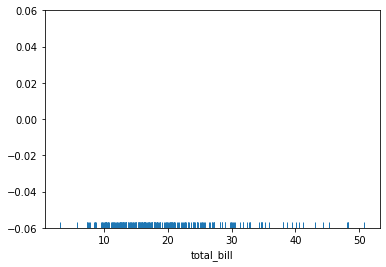

In [42]:
sns.rugplot(tips['total_bill'])

/home/eric/Documents/prog/python/data_science_bootcamp/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

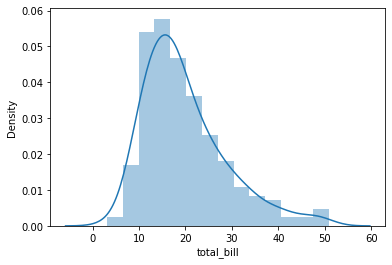

In [41]:
sns.distplot(tips['total_bill'])

+ Difference between histogram and rugplot is histogram puts data points in bins while rugplot is joing a tick for every data point along a distribution line
+ KDE stands for Kernel Density Estimation Plot

(0.0, 1.0)

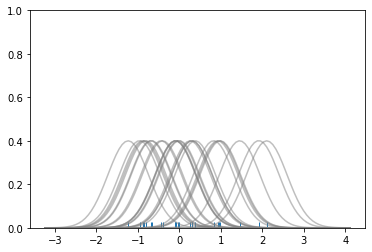

In [38]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

+ Above is a bunch of normal distributions for each point on a rug plot
+ If all these normal distribution were added together then you would get the KDE line

Text(0.5, 0.98, 'Sum of the Basis Functions')

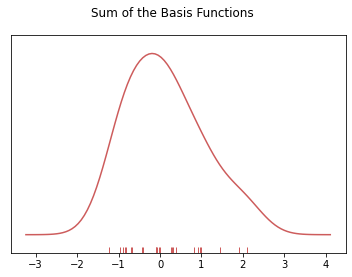

In [43]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

+ KDE for rug plot above

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

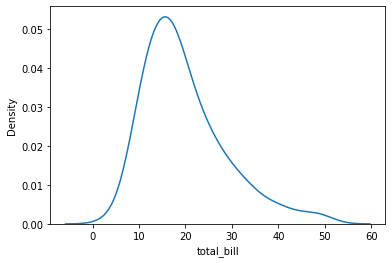

In [44]:
sns.kdeplot(tips['total_bill'])